# Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Data Loading

In [2]:
df = pd.read_csv('hungary.csv')

In [3]:
df.columns =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df.shape

(293, 14)

In [5]:
df.replace('?',-69,inplace = True)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,120,243,0,0,160,0,0.0,-69,-69,-69,0
1,29,1,2,140,-69,0,0,170,0,0.0,-69,-69,-69,0
2,30,0,1,170,237,0,1,170,0,0.0,-69,-69,6,0
3,31,0,2,100,219,0,1,150,0,0.0,-69,-69,-69,0
4,32,0,2,105,198,0,0,165,0,0.0,-69,-69,-69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160,331,0,0,94,1,2.5,-69,-69,-69,1
289,54,0,3,130,294,0,1,100,1,0.0,2,-69,-69,1
290,56,1,4,155,342,1,0,150,1,3.0,2,-69,-69,1
291,58,0,2,180,393,0,0,110,1,1.0,2,-69,7,1


In [7]:
df = df.astype(int)

In [8]:
df.replace(-69,np.nan,inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0,NaN,NaN,NaN,0
1,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0,NaN,NaN,NaN,0
2,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0,NaN,NaN,6.0,0
3,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0,NaN,NaN,NaN,0
4,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2,NaN,NaN,NaN,1
289,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0,2.0,NaN,NaN,1
290,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3,2.0,NaN,NaN,1
291,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1,2.0,NaN,7.0,1


# Handling missing values

In [9]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       189
ca          290
thal        265
target        0
dtype: int64

In [10]:
mean_value=df['trestbps'].mean()  
df['trestbps'].fillna(value=mean_value, inplace=True)

In [11]:
mean_value=df['chol'].mean()  
df['chol'].fillna(value=mean_value, inplace=True)

In [12]:
mean_value=df['thalach'].mean()  
df['thalach'].fillna(value=mean_value, inplace=True)

In [13]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           8
restecg       1
thalach       0
exang         1
oldpeak       0
slope       189
ca          290
thal        265
target        0
dtype: int64

In [14]:
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000
mean,47.894198,0.723549,2.986348,132.592466,251.288889,0.068259,0.211604,138.972603,0.303754,0.549488,1.962457,0.0,6.870307,0.361775
std,7.738385,0.448007,0.965049,17.625917,64.684838,0.252622,0.449050,23.435994,0.460665,0.880793,0.207620,0.0,0.633191,0.481336
min,29.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,7.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,249.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,7.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


# Exploratory Data Analysis

### Disease vs No- Disease Analysis

In [17]:
df.target.value_counts()

0    187
1    106
Name: target, dtype: int64

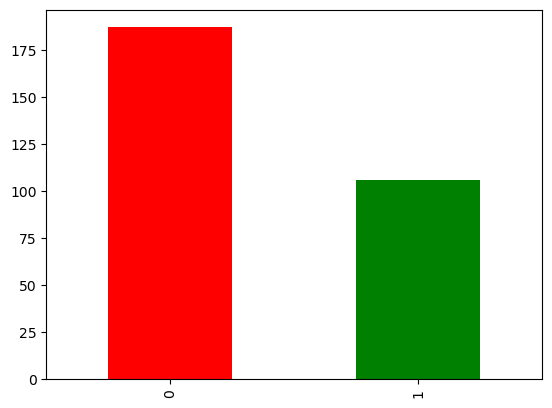

In [18]:
df.target.value_counts().plot(kind='bar',color=['red','green']);

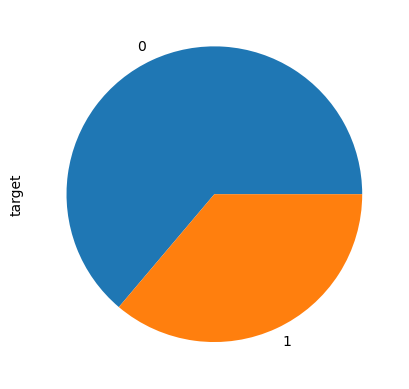

In [19]:
df.target.value_counts().plot(kind='pie');

### Sex dependency visualization

In [20]:
df.sex.value_counts()

1    212
0     81
Name: sex, dtype: int64

In [21]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,69,12
1,118,94


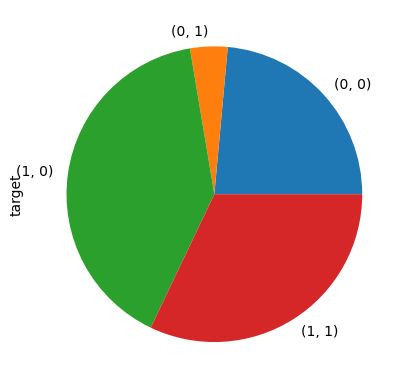

In [22]:
df.groupby(["sex"])["target"].value_counts().plot(kind="pie");

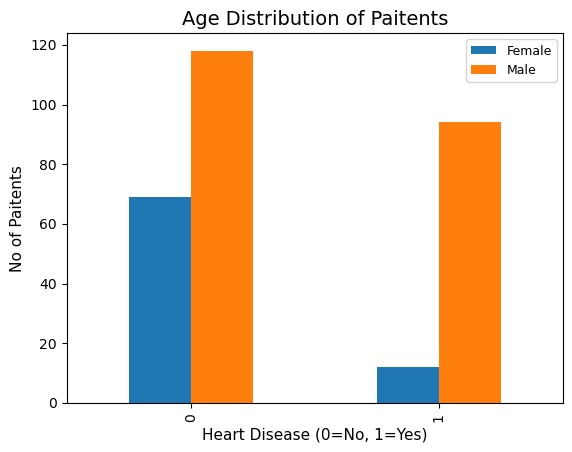

In [23]:
pd.crosstab(df.target, df.sex).plot(kind='bar');
plt.xlabel('Heart Disease (0=No, 1=Yes)', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Age Distribution of Paitents', fontsize = 14)
plt.legend(['Female','Male'], fontsize = 9);

### Further Analysis

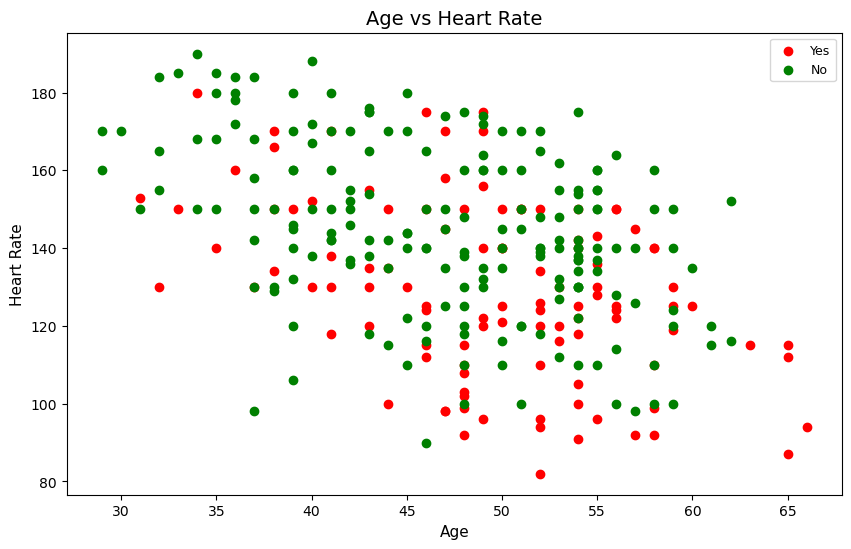

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='green')
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Heart Rate', fontsize = 11)
plt.title('Age vs Heart Rate', fontsize = 14)
plt.legend(['Yes','No'], fontsize = 9);

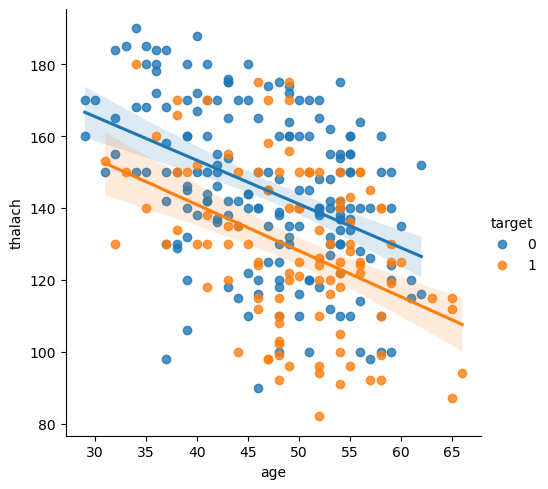

In [25]:
sns.lmplot(data=df, x='age', y='thalach', hue='target');

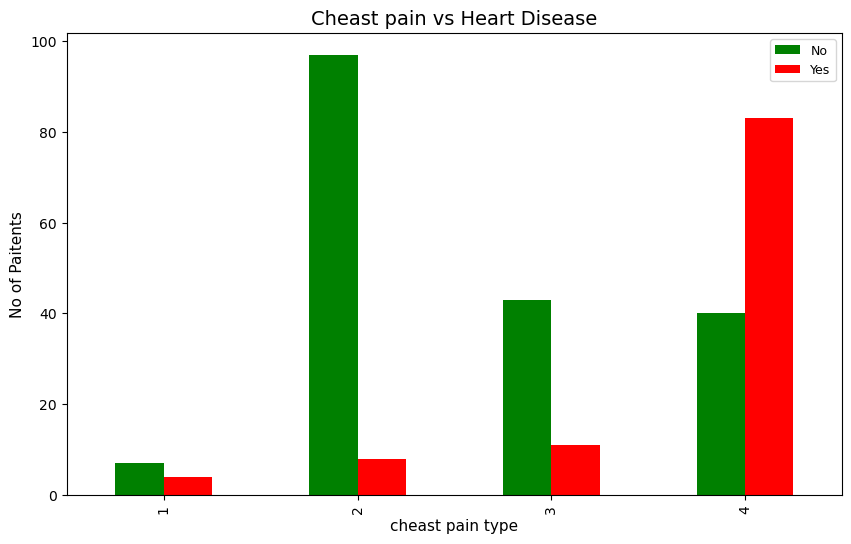

In [26]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['green', 'red']);
plt.xlabel('cheast pain type', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Cheast pain vs Heart Disease', fontsize = 14)
plt.legend(['No','Yes'], fontsize = 9);

### Co-relation Analysis

In [27]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df.drop(['ca'], axis=1, inplace = True)

# Preprocessing as per original paper

# 1. Handling missing values

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

# 2. Normalization

In [30]:
for column in df: 
    a = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    df[column] =  df[column].min() + ((df[column].max() - df[column].min())*a)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,2.0,7.0,0.0
1,29.0,1.0,2.0,140.0,251.288889,0.0,0.0,170.0,0.0,0.0,2.0,7.0,0.0
2,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,2.0,6.0,0.0
3,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,2.0,7.0,0.0
4,32.0,0.0,2.0,105.0,198.000000,0.0,0.0,165.0,0.0,0.0,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52.0,1.0,4.0,160.0,331.000000,0.0,0.0,94.0,1.0,2.0,2.0,7.0,1.0
289,54.0,0.0,3.0,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.0,7.0,1.0
290,56.0,1.0,4.0,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.0,7.0,1.0
291,58.0,0.0,2.0,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.0,7.0,1.0


# Proposed Methodology

# 1. Results using original dataset

In [31]:
X = df.drop('target', axis=1)
y = df.target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)
print(x_train.shape,x_test.shape,X.shape)

(234, 12) (59, 12) (293, 12)


# Logistic Regression

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
log_y_pred = model.predict(x_test)
log_y_pred1 = model.predict(x_train)

accuracy = metrics.accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.864406779661017


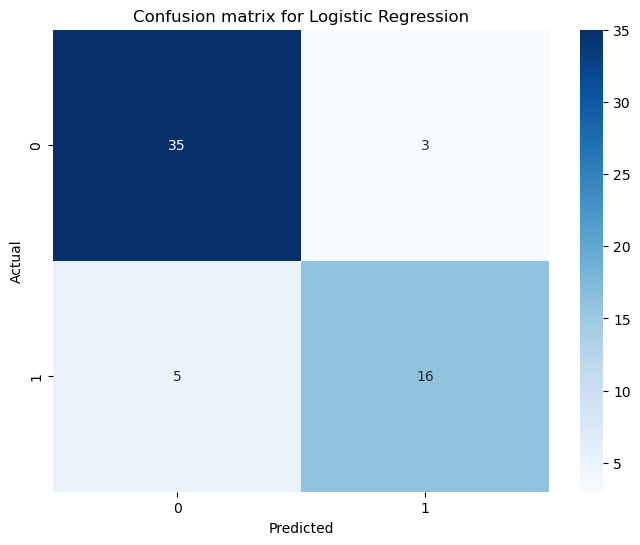

In [34]:
cm = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [35]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.84      0.76      0.80        21

    accuracy                           0.86        59
   macro avg       0.86      0.84      0.85        59
weighted avg       0.86      0.86      0.86        59



# SVM

In [36]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8813559322033898


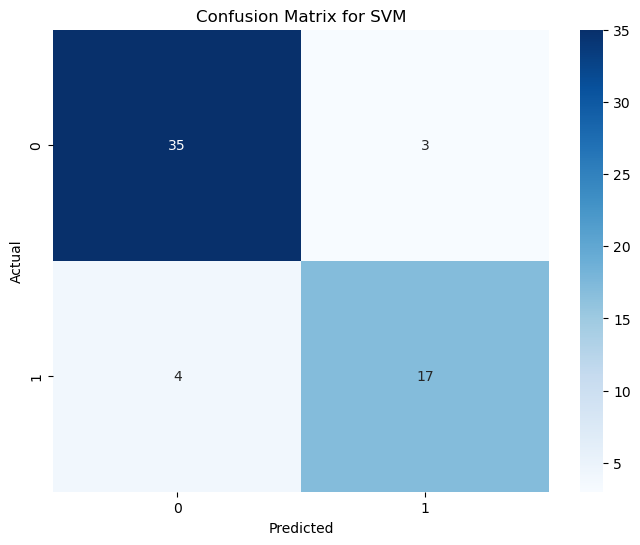

In [37]:
cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [38]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.85      0.81      0.83        21

    accuracy                           0.88        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59



# Random Forest

In [39]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, random_state=0)

In [40]:
RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8135593220338984


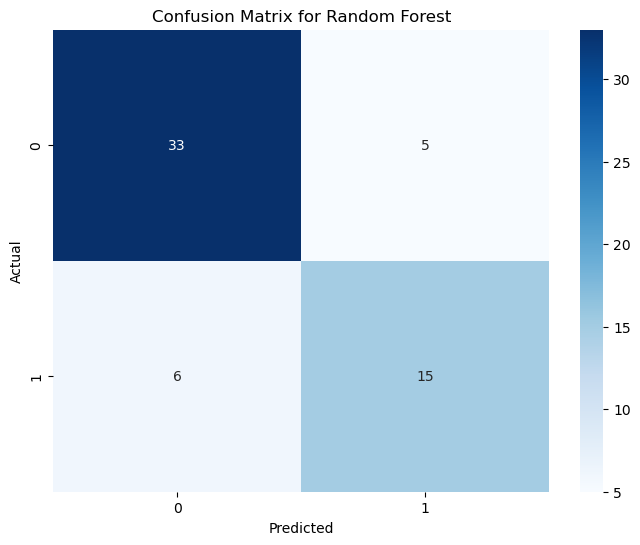

In [41]:
cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [42]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        38
         1.0       0.75      0.71      0.73        21

    accuracy                           0.81        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.81      0.81      0.81        59



# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [44]:
y_hat = neigh.predict(x_test)
y_hat

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0.])

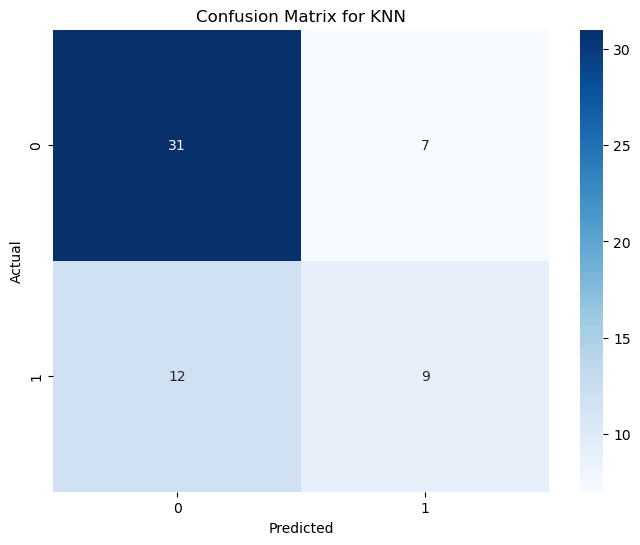

In [45]:
cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [46]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77        38
         1.0       0.56      0.43      0.49        21

    accuracy                           0.68        59
   macro avg       0.64      0.62      0.63        59
weighted avg       0.66      0.68      0.67        59



In [47]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71186441, 0.69491525, 0.59322034, 0.6779661 , 0.66101695,
       0.66101695, 0.62711864, 0.6779661 , 0.69491525])

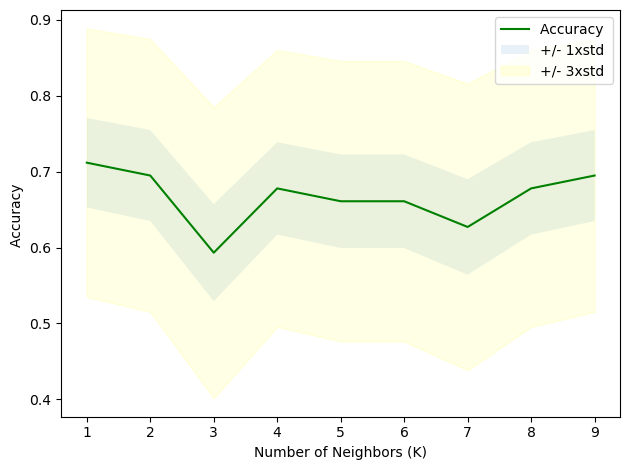

In [48]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84        38
         1.0       0.70      0.76      0.73        21

    accuracy                           0.80        59
   macro avg       0.78      0.79      0.78        59
weighted avg       0.80      0.80      0.80        59



Confusion Matrix:


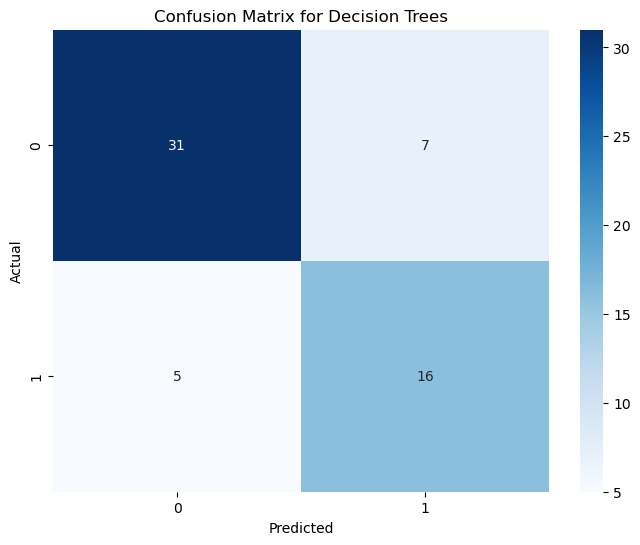

In [50]:
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees')
plt.show()

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7796610169491526
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81        38
         1.0       0.64      0.86      0.73        21

    accuracy                           0.78        59
   macro avg       0.77      0.80      0.77        59
weighted avg       0.81      0.78      0.78        59



Confusion Matrix:
Accuracy: 0.7796610169491526
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81        38
         1.0       0.64      0.86      0.73        21

    accuracy                           0.78        59
   macro avg       0.77      0.80      0.77        59
weighted avg       0.81      0.78      0.78        59

Confusion Matrix:


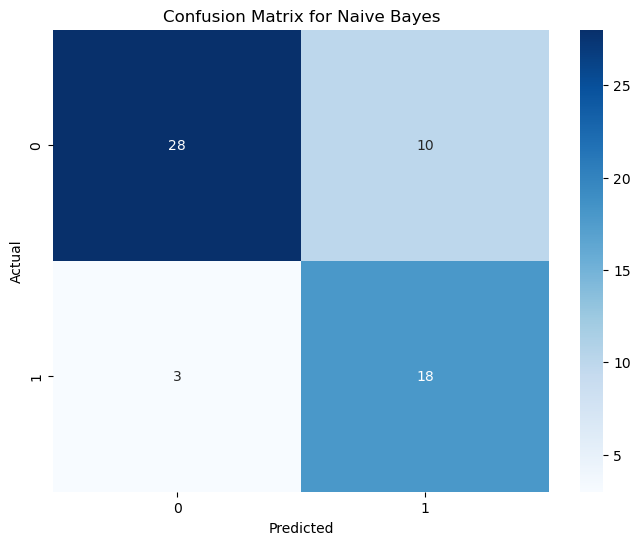

In [52]:
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# 2. Results after Data Balancing (SMOTE)

In [53]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,2.0,7.0,0.0
1,29.0,1.0,2.0,140.0,251.288889,0.0,0.0,170.0,0.0,0.0,2.0,7.0,0.0
2,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,2.0,6.0,0.0
3,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,2.0,7.0,0.0
4,32.0,0.0,2.0,105.0,198.000000,0.0,0.0,165.0,0.0,0.0,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52.0,1.0,4.0,160.0,331.000000,0.0,0.0,94.0,1.0,2.0,2.0,7.0,1.0
289,54.0,0.0,3.0,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.0,7.0,1.0
290,56.0,1.0,4.0,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.0,7.0,1.0
291,58.0,0.0,2.0,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.0,7.0,1.0


In [54]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
164,55.0,1.0,4.0,140.0,229.0,0.0,0.0,110.0,1.0,0.0,2.0,7.0
234,48.0,1.0,4.0,160.0,329.0,0.0,0.0,92.0,1.0,1.0,2.0,7.0
265,53.0,1.0,4.0,180.0,285.0,0.0,1.0,120.0,1.0,1.0,2.0,7.0
254,46.0,1.0,1.0,140.0,272.0,1.0,0.0,175.0,0.0,2.0,2.0,7.0
282,47.0,1.0,4.0,160.0,291.0,0.0,1.0,158.0,1.0,3.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,51.0,0.0,3.0,130.0,220.0,0.0,0.0,160.0,1.0,2.0,1.0,7.0
158,55.0,1.0,2.0,120.0,256.0,1.0,0.0,137.0,0.0,0.0,2.0,7.0
156,55.0,0.0,2.0,122.0,320.0,0.0,0.0,155.0,0.0,0.0,2.0,7.0
99,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,2.0,6.0


In [55]:
y_train

164    0.0
234    1.0
265    1.0
254    1.0
282    1.0
      ... 
117    0.0
158    0.0
156    0.0
99     0.0
135    0.0
Name: target, Length: 234, dtype: float64

In [56]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

Before SMOTE: 
1 :  85
0 :  149


In [57]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

In [58]:
x_train1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,55.000000,1.0,4.000000,140.000000,229.000000,0.000000,0.00000,110.000000,1.000000,0.000000,2.0,7.000000
1,48.000000,1.0,4.000000,160.000000,329.000000,0.000000,0.00000,92.000000,1.000000,1.000000,2.0,7.000000
2,53.000000,1.0,4.000000,180.000000,285.000000,0.000000,1.00000,120.000000,1.000000,1.000000,2.0,7.000000
3,46.000000,1.0,1.000000,140.000000,272.000000,1.000000,0.00000,175.000000,0.000000,2.000000,2.0,7.000000
4,47.000000,1.0,4.000000,160.000000,291.000000,0.000000,1.00000,158.000000,1.000000,3.000000,2.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
293,48.527640,1.0,4.000000,134.212734,421.940524,0.000000,0.00000,132.102172,1.000000,1.710637,2.0,6.710637
294,38.331549,1.0,3.801071,120.000000,282.596788,0.000000,0.06631,169.005353,0.000000,0.000000,2.0,7.000000
295,54.000000,1.0,3.087656,120.438278,235.159233,0.000000,0.00000,149.123444,0.912344,0.912344,2.0,7.000000
296,55.000000,1.0,1.999771,159.995410,292.000688,0.999771,0.00000,142.998394,0.999771,1.999541,2.0,7.000000


In [59]:
y_train1

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
293    1.0
294    1.0
295    1.0
296    1.0
297    1.0
Name: target, Length: 298, dtype: float64

In [60]:
print("After SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train1:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

After SMOTE: 
1 :  149
0 :  149


In [61]:
print(x_train1.shape,x_test.shape,X.shape)
print(y_train1.shape,y_test.shape,y.shape)

(298, 12) (59, 12) (293, 12)
(298,) (59,) (293,)


# Logistic Regression

In [62]:
model = LogisticRegression(max_iter=3000)
model.fit(x_train1, y_train1)
log_y_pred = model.predict(x_test)
log_y_pred1 = model.predict(x_train1)

accuracy = metrics.accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7796610169491526


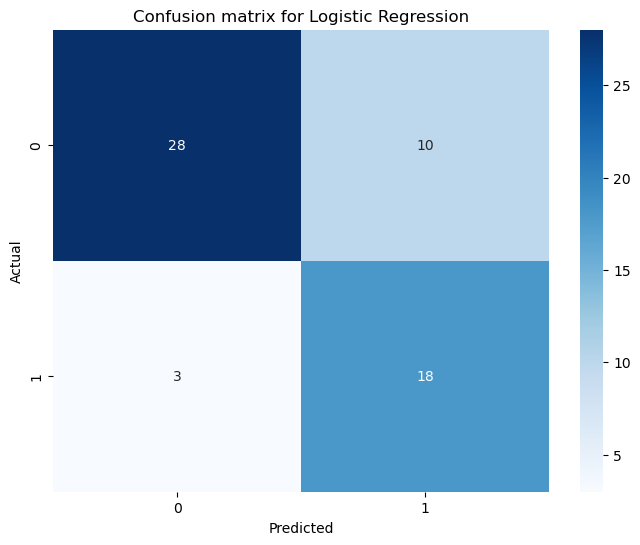

In [63]:
cm = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [64]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81        38
         1.0       0.64      0.86      0.73        21

    accuracy                           0.78        59
   macro avg       0.77      0.80      0.77        59
weighted avg       0.81      0.78      0.78        59



# SVM

In [65]:
svc= SVC(kernel='linear')
svc.fit(x_train1, y_train1)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train1)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7627118644067796


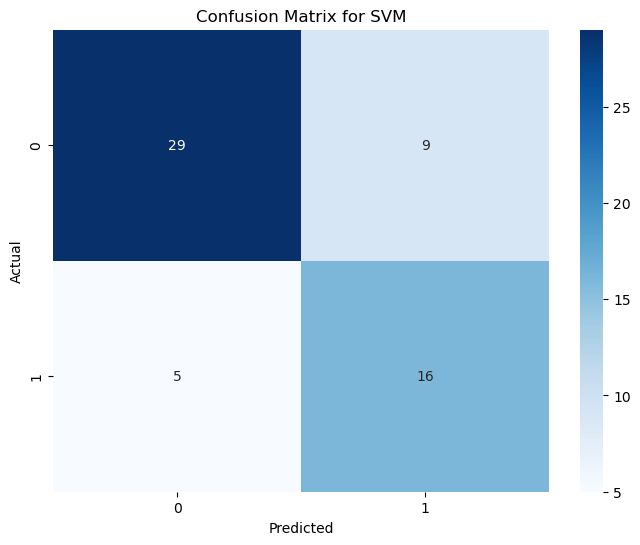

In [66]:
cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [67]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.81        38
         1.0       0.64      0.76      0.70        21

    accuracy                           0.76        59
   macro avg       0.75      0.76      0.75        59
weighted avg       0.78      0.76      0.77        59



# Random Forest

In [68]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train1, y_train1)

RandomForestClassifier(max_depth=7, random_state=0)

In [69]:
RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7796610169491526


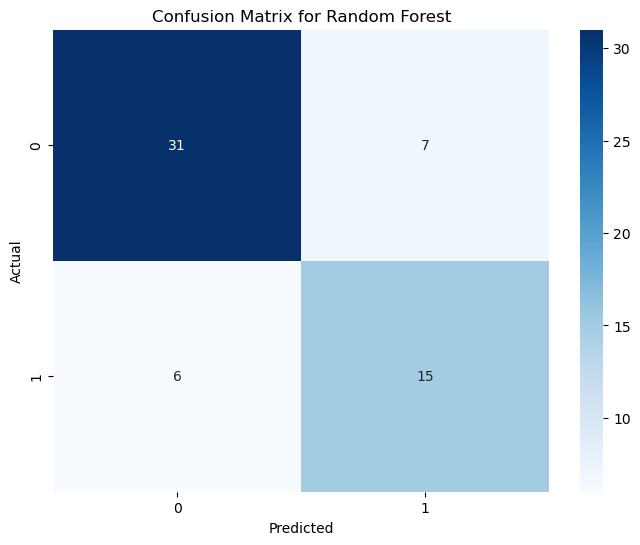

In [70]:
cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [71]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        38
         1.0       0.68      0.71      0.70        21

    accuracy                           0.78        59
   macro avg       0.76      0.77      0.76        59
weighted avg       0.78      0.78      0.78        59



# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train1 , y_train1)
neigh

KNeighborsClassifier(n_neighbors=4)

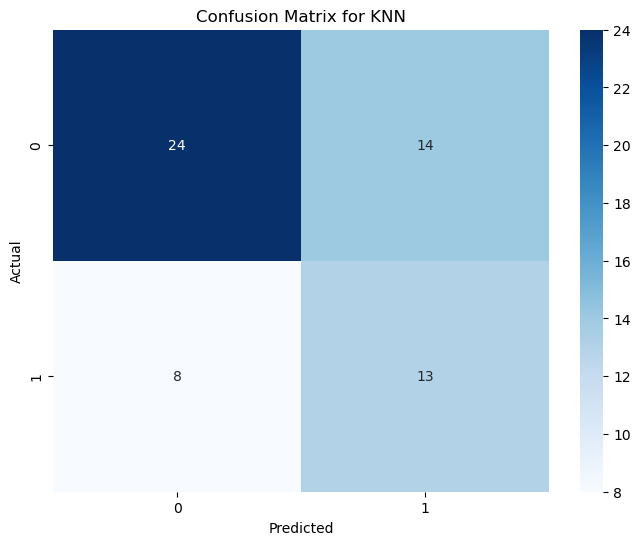

In [73]:
y_hat = neigh.predict(x_test)
cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [74]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.75      0.63      0.69        38
         1.0       0.48      0.62      0.54        21

    accuracy                           0.63        59
   macro avg       0.62      0.63      0.61        59
weighted avg       0.65      0.63      0.63        59



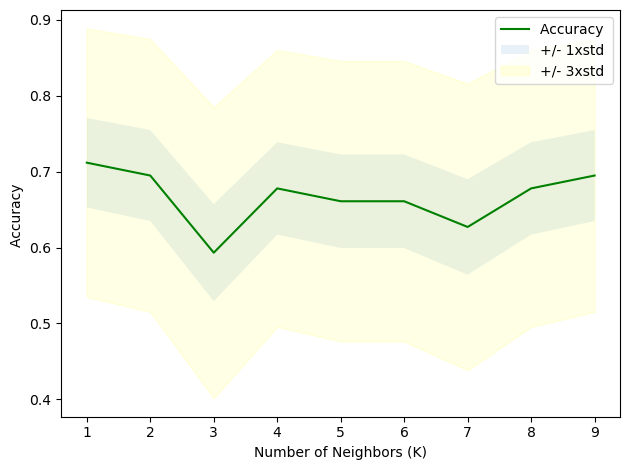

In [75]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Trees

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(x_train1, y_train1)
y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7796610169491526
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.65      0.81      0.72        21

    accuracy                           0.78        59
   macro avg       0.77      0.79      0.77        59
weighted avg       0.80      0.78      0.78        59



Confusion Matrix:


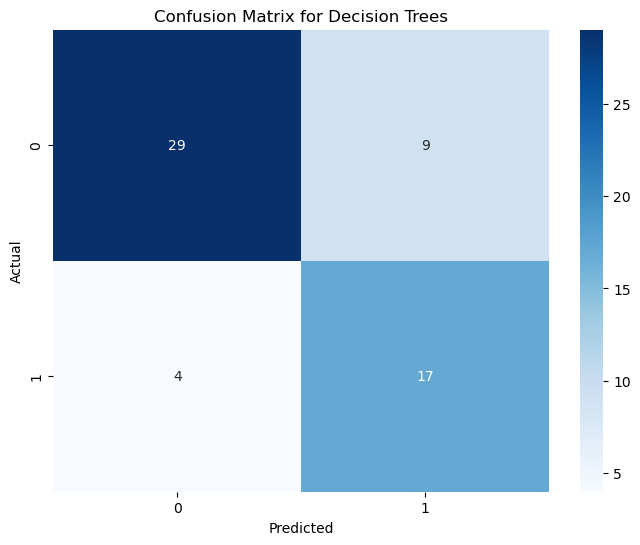

In [77]:
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees')
plt.show()

# Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train1, y_train1)

y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7457627118644068
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77        38
         1.0       0.59      0.90      0.72        21

    accuracy                           0.75        59
   macro avg       0.76      0.78      0.74        59
weighted avg       0.81      0.75      0.75        59



Confusion Matrix:
Accuracy: 0.7457627118644068
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77        38
         1.0       0.59      0.90      0.72        21

    accuracy                           0.75        59
   macro avg       0.76      0.78      0.74        59
weighted avg       0.81      0.75      0.75        59

Confusion Matrix:


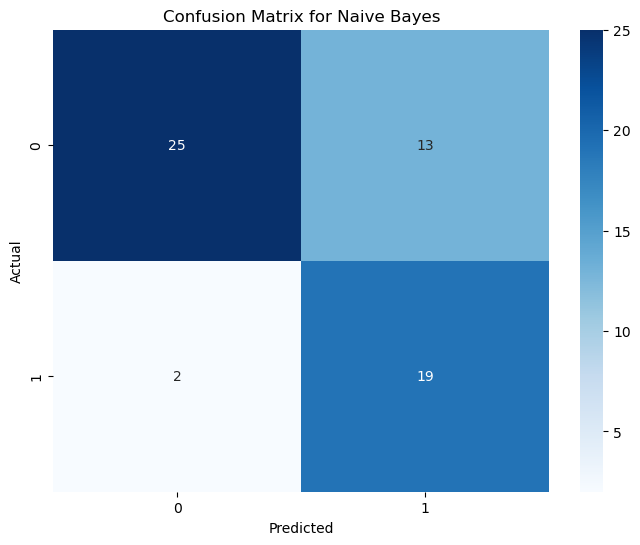

In [79]:
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# 3. Feature Selection

# A. Relief Feature Selection 

In [80]:
import pandas as pd
import numpy as np
from skrebate import ReliefF

X = df.drop('target', axis=1)
y = df.target

X = pd.get_dummies(X)
relief = ReliefF()
relief.fit(X.to_numpy(), y.to_numpy())

feature_scores = relief.feature_importances_

print(feature_scores)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'ReliefF Score': feature_scores})

# Sort the features by their ReliefF scores in descending order to get the ranking
feature_ranking = feature_ranking.sort_values(by='ReliefF Score', ascending=False)

# Print the ranked features
print(feature_ranking)

[0.01224241 0.05767918 0.2883959  0.02542331 0.02529254 0.018157
 0.02238908 0.05986606 0.36846416 0.31068259 0.00569966 0.01491468]
     Feature  ReliefF Score
8      exang       0.368464
9    oldpeak       0.310683
2         cp       0.288396
7    thalach       0.059866
1        sex       0.057679
3   trestbps       0.025423
4       chol       0.025293
6    restecg       0.022389
5        fbs       0.018157
11      thal       0.014915
0        age       0.012242
10     slope       0.005700


# Top 50% Analysis

In [81]:
features_r=['thalach','exang','cp','trestbps','sex','oldpeak']       
df2=df[features_r]

x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
df2

,thalach,exang,cp,trestbps,sex,oldpeak
0,160.0,0.0,2.0,120.0,1.0,0.0
1,170.0,0.0,2.0,140.0,1.0,0.0
2,170.0,0.0,1.0,170.0,0.0,0.0
3,150.0,0.0,2.0,100.0,0.0,0.0
4,165.0,0.0,2.0,105.0,0.0,0.0
...,...,...,...,...,...,...
288,94.0,1.0,4.0,160.0,1.0,2.0
289,100.0,1.0,3.0,130.0,0.0,0.0
290,150.0,1.0,4.0,155.0,1.0,3.0
291,110.0,1.0,2.0,180.0,0.0,1.0


# SVM

In [82]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        39
         1.0       0.72      0.65      0.68        20

    accuracy                           0.80        59
   macro avg       0.78      0.76      0.77        59
weighted avg       0.79      0.80      0.79        59



# KNN

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        39
         1.0       0.62      0.40      0.48        20

    accuracy                           0.71        59
   macro avg       0.68      0.64      0.64        59
weighted avg       0.70      0.71      0.69        59



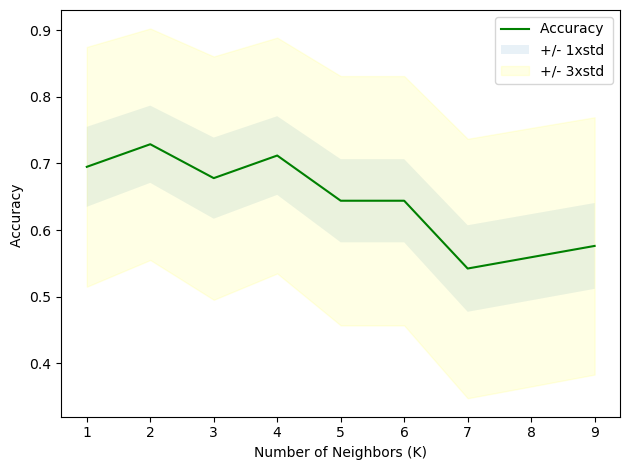

In [83]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test,y_hat))

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        39
         1.0       0.83      0.50      0.62        20

    accuracy                           0.80        59
   macro avg       0.81      0.72      0.74        59
weighted avg       0.80      0.80      0.78        59



# Random Forest

In [85]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        39
         1.0       0.72      0.65      0.68        20

    accuracy                           0.80        59
   macro avg       0.78      0.76      0.77        59
weighted avg       0.79      0.80      0.79        59



# Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7627118644067796
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        39
         1.0       0.65      0.65      0.65        20

    accuracy                           0.76        59
   macro avg       0.74      0.74      0.74        59
weighted avg       0.76      0.76      0.76        59



# Top 70% Analysis

In [87]:
features_r=['thalach','exang','cp','trestbps','sex','oldpeak','chol','restecg']       
df2=df[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
df2

,thalach,exang,cp,trestbps,sex,oldpeak,chol,restecg
0,160.0,0.0,2.0,120.0,1.0,0.0,243.000000,0.0
1,170.0,0.0,2.0,140.0,1.0,0.0,251.288889,0.0
2,170.0,0.0,1.0,170.0,0.0,0.0,237.000000,1.0
3,150.0,0.0,2.0,100.0,0.0,0.0,219.000000,1.0
4,165.0,0.0,2.0,105.0,0.0,0.0,198.000000,0.0
...,...,...,...,...,...,...,...,...
288,94.0,1.0,4.0,160.0,1.0,2.0,331.000000,0.0
289,100.0,1.0,3.0,130.0,0.0,0.0,294.000000,1.0
290,150.0,1.0,4.0,155.0,1.0,3.0,342.000000,0.0
291,110.0,1.0,2.0,180.0,0.0,1.0,393.000000,0.0


# SVM

In [88]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.8135593220338984
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        39
         1.0       0.74      0.70      0.72        20

    accuracy                           0.81        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.81      0.81      0.81        59



# KNN

              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76        39
         1.0       0.50      0.35      0.41        20

    accuracy                           0.66        59
   macro avg       0.61      0.59      0.59        59
weighted avg       0.64      0.66      0.64        59



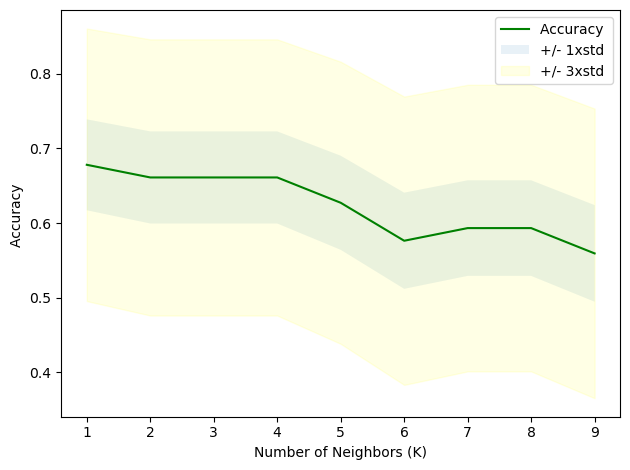

In [89]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test,y_hat))

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Random Forest

In [90]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        39
         1.0       0.72      0.65      0.68        20

    accuracy                           0.80        59
   macro avg       0.78      0.76      0.77        59
weighted avg       0.79      0.80      0.79        59



# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7796610169491526
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85        39
         1.0       0.77      0.50      0.61        20

    accuracy                           0.78        59
   macro avg       0.78      0.71      0.73        59
weighted avg       0.78      0.78      0.77        59



# Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7796610169491526
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        39
         1.0       0.67      0.70      0.68        20

    accuracy                           0.78        59
   macro avg       0.75      0.76      0.76        59
weighted avg       0.78      0.78      0.78        59



# B. Correlation based feature selection

In [93]:
X = df.drop('target', axis=1)
y = df.target

score=[]
for feature in X.columns:
    correlation=df[feature].corr(y)
    score.append(correlation)
    
correlation_dict = {column: correlation for column, correlation in zip(X.columns, score)}
st = dict(sorted(correlation_dict.items(), key=lambda X: X[1], reverse=True))

In [94]:
my_dict = {"Feature" : [], "Score" : []}
key = [i for i in st.keys()]
score = [i for i in st.values()]
for i in key:
    my_dict['Feature'].append(i)
for i in score:
    my_dict['Score'].append(i)
    
res = pd.DataFrame.from_dict(my_dict)
res

,Feature,Score
0,exang,0.583847
1,oldpeak,0.531152
2,cp,0.504631
3,sex,0.274804
4,chol,0.198848
5,slope,0.170642
6,fbs,0.162353
7,age,0.154662
8,trestbps,0.139343
9,thal,0.087055


# Top 50% Analysis

In [95]:
features_r=['cp', 'sex', 'exang', 'oldpeak','chol','slope']       
df2=df[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
df2

,cp,sex,exang,oldpeak,chol,slope
0,2.0,1.0,0.0,0.0,243.000000,2.0
1,2.0,1.0,0.0,0.0,251.288889,2.0
2,1.0,0.0,0.0,0.0,237.000000,2.0
3,2.0,0.0,0.0,0.0,219.000000,2.0
4,2.0,0.0,0.0,0.0,198.000000,2.0
...,...,...,...,...,...,...
288,4.0,1.0,1.0,2.0,331.000000,2.0
289,3.0,0.0,1.0,0.0,294.000000,2.0
290,4.0,1.0,1.0,3.0,342.000000,2.0
291,2.0,0.0,1.0,1.0,393.000000,2.0


# SVM

In [96]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.8135593220338984
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        39
         1.0       0.76      0.65      0.70        20

    accuracy                           0.81        59
   macro avg       0.80      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59



# Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5932203389830508
              precision    recall  f1-score   support

         0.0       0.80      0.51      0.62        39
         1.0       0.44      0.75      0.56        20

    accuracy                           0.59        59
   macro avg       0.62      0.63      0.59        59
weighted avg       0.68      0.59      0.60        59



# Random Forest

In [98]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.8305084745762712
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        39
         1.0       0.81      0.65      0.72        20

    accuracy                           0.83        59
   macro avg       0.82      0.79      0.80        59
weighted avg       0.83      0.83      0.83        59



# KNN

              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        39
         1.0       0.57      0.20      0.30        20

    accuracy                           0.68        59
   macro avg       0.63      0.56      0.54        59
weighted avg       0.65      0.68      0.62        59



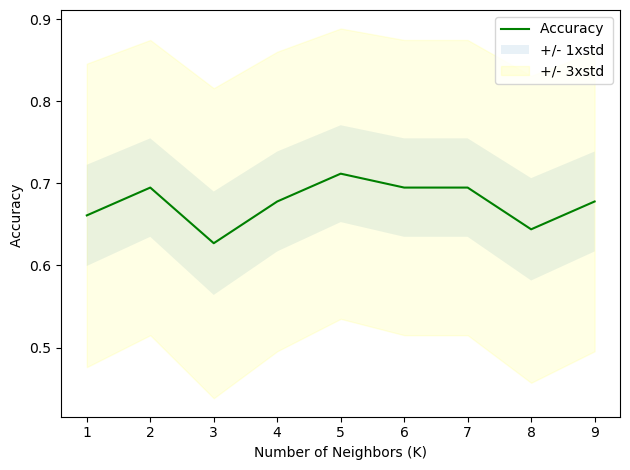

In [99]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test,y_hat))

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Trees

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7457627118644068
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        39
         1.0       0.63      0.60      0.62        20

    accuracy                           0.75        59
   macro avg       0.72      0.71      0.71        59
weighted avg       0.74      0.75      0.74        59



# Top 70% Analysis

In [101]:
features_r=['cp', 'sex', 'exang', 'oldpeak','chol','slope', 'fbs', 'age']          
df2=df[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
df2

,cp,sex,exang,oldpeak,chol,slope,fbs,age
0,2.0,1.0,0.0,0.0,243.000000,2.0,0.0,29.0
1,2.0,1.0,0.0,0.0,251.288889,2.0,0.0,29.0
2,1.0,0.0,0.0,0.0,237.000000,2.0,0.0,30.0
3,2.0,0.0,0.0,0.0,219.000000,2.0,0.0,31.0
4,2.0,0.0,0.0,0.0,198.000000,2.0,0.0,32.0
...,...,...,...,...,...,...,...,...
288,4.0,1.0,1.0,2.0,331.000000,2.0,0.0,52.0
289,3.0,0.0,1.0,0.0,294.000000,2.0,0.0,54.0
290,4.0,1.0,1.0,3.0,342.000000,2.0,1.0,56.0
291,2.0,0.0,1.0,1.0,393.000000,2.0,0.0,58.0


# SVM

In [102]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.8135593220338984
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        39
         1.0       0.76      0.65      0.70        20

    accuracy                           0.81        59
   macro avg       0.80      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59



# Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6271186440677966
              precision    recall  f1-score   support

         0.0       0.81      0.56      0.67        39
         1.0       0.47      0.75      0.58        20

    accuracy                           0.63        59
   macro avg       0.64      0.66      0.62        59
weighted avg       0.70      0.63      0.64        59



# Random Forest

In [104]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.7627118644067796
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83        39
         1.0       0.67      0.60      0.63        20

    accuracy                           0.76        59
   macro avg       0.74      0.72      0.73        59
weighted avg       0.76      0.76      0.76        59



# KNN

              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79        39
         1.0       0.56      0.25      0.34        20

    accuracy                           0.68        59
   macro avg       0.63      0.57      0.57        59
weighted avg       0.65      0.68      0.64        59



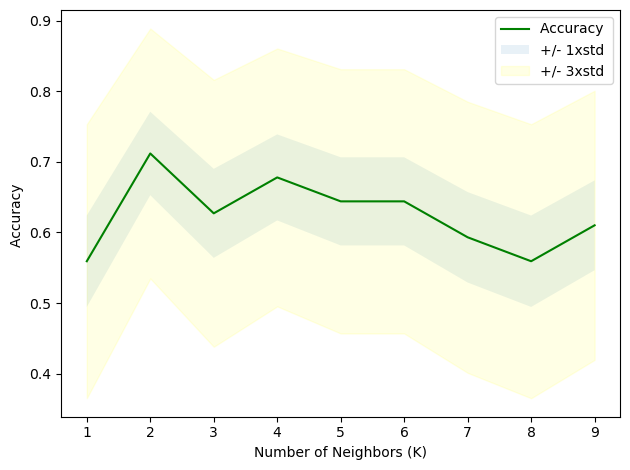

In [105]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test,y_hat))

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Trees

In [106]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7457627118644068
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        39
         1.0       0.63      0.60      0.62        20

    accuracy                           0.75        59
   macro avg       0.72      0.71      0.71        59
weighted avg       0.74      0.75      0.74        59



# C. Info Gain Feature Selection

In [107]:
X = df.drop('target', axis=1)
y = df.target

from sklearn.feature_selection import mutual_info_classif
info_gains = mutual_info_classif(X, y)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_ranking = feature_ranking.sort_values(by='Information Gain', ascending=False)
feature_ranking

,Feature,Information Gain
8,exang,0.192679
2,cp,0.168388
9,oldpeak,0.160665
7,thalach,0.068835
4,chol,0.054312
5,fbs,0.022541
1,sex,0.018524
0,age,0.012262
11,thal,0.004311
3,trestbps,0.000000


# Top 50% Analysis

In [108]:
features_r=['cp', 'thalach', 'oldpeak', 'slope', 'age','exang']       
df2=df[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
df2

,cp,thalach,oldpeak,slope,age,exang
0,2.0,160.0,0.0,2.0,29.0,0.0
1,2.0,170.0,0.0,2.0,29.0,0.0
2,1.0,170.0,0.0,2.0,30.0,0.0
3,2.0,150.0,0.0,2.0,31.0,0.0
4,2.0,165.0,0.0,2.0,32.0,0.0
...,...,...,...,...,...,...
288,4.0,94.0,2.0,2.0,52.0,1.0
289,3.0,100.0,0.0,2.0,54.0,1.0
290,4.0,150.0,3.0,2.0,56.0,1.0
291,2.0,110.0,1.0,2.0,58.0,1.0


# SVM

In [109]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.8135593220338984
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        39
         1.0       0.76      0.65      0.70        20

    accuracy                           0.81        59
   macro avg       0.80      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59



# KNN

              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79        39
         1.0       0.56      0.25      0.34        20

    accuracy                           0.68        59
   macro avg       0.63      0.57      0.57        59
weighted avg       0.65      0.68      0.64        59



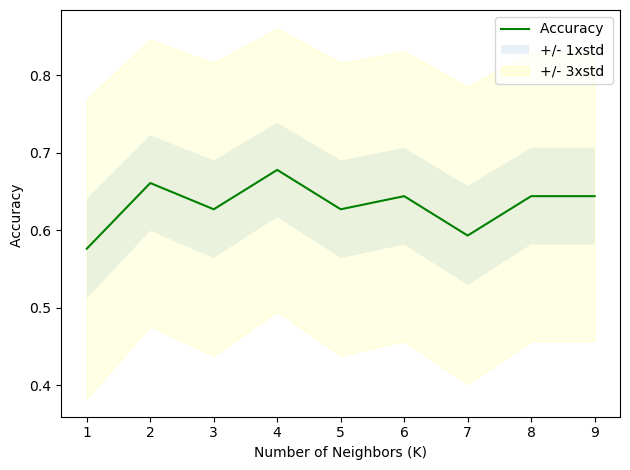

In [110]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test,y_hat))

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.559322033898305
              precision    recall  f1-score   support

         0.0       0.81      0.44      0.57        39
         1.0       0.42      0.80      0.55        20

    accuracy                           0.56        59
   macro avg       0.62      0.62      0.56        59
weighted avg       0.68      0.56      0.56        59



# Random Forest

In [112]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        39
         1.0       0.72      0.65      0.68        20

    accuracy                           0.80        59
   macro avg       0.78      0.76      0.77        59
weighted avg       0.79      0.80      0.79        59



# Decision Trees

In [113]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        39
         1.0       0.75      0.60      0.67        20

    accuracy                           0.80        59
   macro avg       0.78      0.75      0.76        59
weighted avg       0.79      0.80      0.79        59



# Top 70% Analysis

In [114]:
features_r=['cp', 'thalach', 'oldpeak', 'slope', 'age','exang','chol', 'sex']    
df2=df[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
df2

,cp,thalach,oldpeak,slope,age,exang,chol,sex
0,2.0,160.0,0.0,2.0,29.0,0.0,243.000000,1.0
1,2.0,170.0,0.0,2.0,29.0,0.0,251.288889,1.0
2,1.0,170.0,0.0,2.0,30.0,0.0,237.000000,0.0
3,2.0,150.0,0.0,2.0,31.0,0.0,219.000000,0.0
4,2.0,165.0,0.0,2.0,32.0,0.0,198.000000,0.0
...,...,...,...,...,...,...,...,...
288,4.0,94.0,2.0,2.0,52.0,1.0,331.000000,1.0
289,3.0,100.0,0.0,2.0,54.0,1.0,294.000000,0.0
290,4.0,150.0,3.0,2.0,56.0,1.0,342.000000,1.0
291,2.0,110.0,1.0,2.0,58.0,1.0,393.000000,0.0


# SVM

In [115]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.8305084745762712
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88        39
         1.0       0.78      0.70      0.74        20

    accuracy                           0.83        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.83      0.83      0.83        59



# KNN

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.71        39
         1.0       0.36      0.25      0.29        20

    accuracy                           0.59        59
   macro avg       0.51      0.51      0.50        59
weighted avg       0.56      0.59      0.57        59



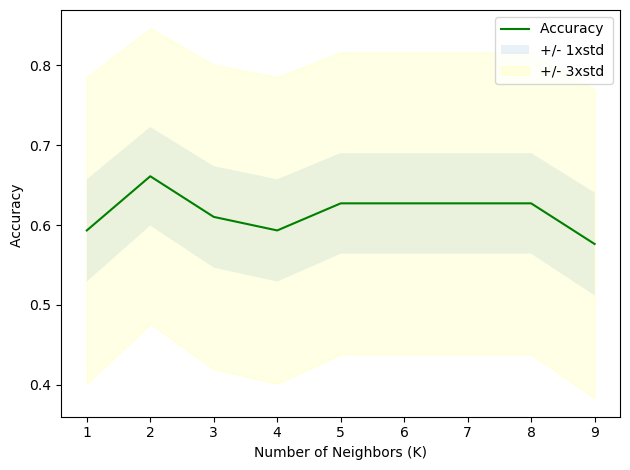

In [116]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)
print(classification_report(y_test,y_hat))

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6101694915254238
              precision    recall  f1-score   support

         0.0       0.81      0.54      0.65        39
         1.0       0.45      0.75      0.57        20

    accuracy                           0.61        59
   macro avg       0.63      0.64      0.61        59
weighted avg       0.69      0.61      0.62        59



# Random Forest

In [118]:
RF = RandomForestClassifier(max_depth=7,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        39
         1.0       0.75      0.60      0.67        20

    accuracy                           0.80        59
   macro avg       0.78      0.75      0.76        59
weighted avg       0.79      0.80      0.79        59



# Decision Trees

In [119]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7627118644067796
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83        39
         1.0       0.71      0.50      0.59        20

    accuracy                           0.76        59
   macro avg       0.75      0.70      0.71        59
weighted avg       0.76      0.76      0.75        59

